In [1]:
%pylab inline
import LFPy

Populating the interactive namespace from numpy and matplotlib
Failed to setup nrnpy_pr


/home/ben/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [22]:
cellParameters = {
    'morphology' : 'ball_and_stick.hoc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'passive': True,
    'passive_parameters': {'g_pas':0.001, 'e_pas':-70},
    'nsegs_method': 'fixed_length',
    'max_nsegs_length':50
}

SynapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : -20,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.009,
    'record_current' : True,
}

z = mgrid[-400:1201:100]
electrodeParameters = {
    'x' : zeros(z.size),
    'y' : zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}

In [23]:
# Cell 1
cell = LFPy.Cell(**cellParameters)
cell.set_pos(x=-250, y=0, z=0)
cell.set_rotation(z=np.pi)


synapse = LFPy.Synapse(cell,
                       idx = cell.get_closest_idx(x=-250,z=500),
                       **SynapseParameters)

synapse.set_spike_times(array([50]))       

electrode = LFPy.RecExtElectrode(**electrodeParameters)

In [24]:
cell.simulate(electrode=electrode,rec_imem=True,rec_ipas=True,rec_icap=True)

(-500, 1300)

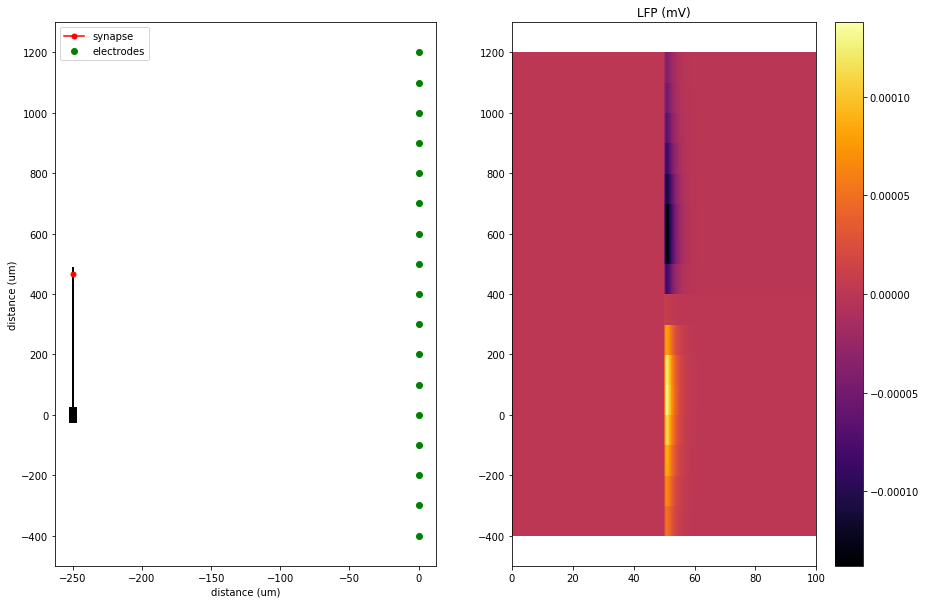

In [25]:
figure(figsize=(15, 10))
#subplot(2,3,4)


subplot(1,2,1)
# Plot geometry of the cell
for sec in LFPy.cell.neuron.h.allsec():
    idx = cell.get_idx(sec.name())
    if sec.name()=="soma[0]":
        plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
            np.r_[cell.zstart[idx], cell.zend[idx][-1]],
            'k',linewidth=8)
    else:
        plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
            np.r_[cell.zstart[idx], cell.zend[idx][-1]],
            'k',linewidth=2)
# Plot synapse as red dot
plot([cell.synapses[0].x], [cell.synapses[0].z], \
     color='r', marker='o', markersize=5,label='synapse')
# Plot electrodes as green dots
plot(electrode.x, electrode.z, '.', marker='o', color='g',label='electrodes')

xlabel('distance (um)')
ylabel('distance (um)')
ylim(-500,1300)
legend()

        
#### Calculate extracellular potential by hand
'''
# electrode 5 is at 0,100
h = np.zeros((5,1))
l = np.zeros((5,1))
r = np.zeros((5,1))

for i in np.arange(0,5):
    h[i,0] = electrode.z[5]-cell.zend[i]
    l[i,0] = electrode.z[5]-cell.zstart[i]
    r[i,0] = electrode.x[5]-cell.xstart[i]

dist = np.log((np.sqrt(h**2+r**2)-h)/(np.sqrt(l**2+r**2)-l))
v_ext=1000*(1/(4*np.pi*300*5))*np.dot(np.transpose(cell.imem),dist)
'''
subplot(1,2,2)
pcolormesh(cell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max(),
           cmap='inferno'), colorbar(), title('LFP (mV)')
ylim(-500,1300)

(89, 1601)
